In [1]:
from hydrogen import pauli_operator

H2_op = pauli_operator()
print(H2_op)

SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ', 'XX'],
              coeffs=[-1.05237325+0.j,  0.39793742+0.j, -0.39793742+0.j, -0.0112801 +0.j,
  0.1809312 +0.j])


In [2]:
import numpy as np

eigens_exact = np.linalg.eigvalsh(H2_op.to_matrix())
print(eigens_exact)

[-1.85727503 -1.24458455 -0.88272215 -0.22491125]


In [3]:
from qiskit.algorithms.optimizers import SPSA 
from qiskit.algorithms.state_fidelities import ComputeUncompute
from qiskit.circuit.library import EfficientSU2
from qiskit.primitives import Sampler, Estimator

ansatz = EfficientSU2(2)
sampler = Sampler()
estimator = Estimator()
fidelity = ComputeUncompute(sampler)

In [4]:
callback = lambda nfev, params, fval, step, acc: print(f'Evaluation {nfev}: {fval}')
optimizer = SPSA(callback=callback, maxiter=1000)

In [10]:
kk = 2
beta = 10
results = []
wavefuncs = []
for eidx in range(kk):
    cost_func = lambda params: \
        estimator.run(ansatz, H2_op, parameter_values=params).result().values[0] + \
        sum([beta*fidelity.run(ansatz, ansatz, params, wavefuncs[idx]).result().fidelities[0] for idx in range(eidx)])
    result = optimizer.minimize(cost_func, x0=np.zeros(ansatz.num_parameters))
    wavefuncs.append(result.x)
    results.append(estimator.run(ansatz, H2_op, parameter_values=result.x).result().values[0])
    print(f'Eigenvalue {eidx}: {results[eidx]}')


Evaluation 3: -1.0685834202466682
Evaluation 6: -1.0422844887620013
Evaluation 9: -1.167572537942755
Evaluation 12: -1.1919776495025491
Evaluation 15: -1.5348071875529823
Evaluation 18: -1.4938870528555046
Evaluation 21: -1.1583543920390789
Evaluation 24: -0.8676592998454092
Evaluation 27: -0.8732921226825441
Evaluation 30: -1.050351709049314
Evaluation 33: -1.5129948759968552
Evaluation 36: -1.6068141992888052
Evaluation 39: -1.4586152403120407
Evaluation 42: -1.2892206942677986
Evaluation 45: -1.3190087402842623
Evaluation 48: -1.34114226600988
Evaluation 51: -1.1524041513017884
Evaluation 54: -0.9282231193549484
Evaluation 57: -1.4708121111577275
Evaluation 60: -1.0832607765656608
Evaluation 63: -1.2037091753515081
Evaluation 66: -1.0130353694398704
Evaluation 69: -0.7924239114473179
Evaluation 72: -0.973901578824278
Evaluation 75: -0.9957492548563529
Evaluation 78: -1.2044225264319042
Evaluation 81: -1.2596164531578997
Evaluation 84: -1.259405001211938
Evaluation 87: -1.32978268986

Evaluation 777: -1.8569633828795207
Evaluation 780: -1.8565714675310965
Evaluation 783: -1.8565678411515936
Evaluation 786: -1.856505535700924
Evaluation 789: -1.8564586688853926
Evaluation 792: -1.8565118277114314
Evaluation 795: -1.8565184918899496
Evaluation 798: -1.8566356413932676
Evaluation 801: -1.8566305797852816
Evaluation 804: -1.8565948053956798
Evaluation 807: -1.8566029274071871
Evaluation 810: -1.856667394344049
Evaluation 813: -1.8569072183499609
Evaluation 816: -1.856861560836313
Evaluation 819: -1.8568483872047334
Evaluation 822: -1.8568575307592081
Evaluation 825: -1.8568806607719308
Evaluation 828: -1.8570606396116518
Evaluation 831: -1.857060744421827
Evaluation 834: -1.8570891956197577
Evaluation 837: -1.8570890874539474
Evaluation 840: -1.8567545096896991
Evaluation 843: -1.856903862106005
Evaluation 846: -1.8568849893075758
Evaluation 849: -1.8568767283717518
Evaluation 852: -1.8570289783536433
Evaluation 855: -1.8569959045591455
Evaluation 858: -1.85700166991918

Evaluation 1551: -1.8571622950910995
Evaluation 1554: -1.8571806786699754
Evaluation 1557: -1.857181040790116
Evaluation 1560: -1.8571791176031376
Evaluation 1563: -1.8572179839968117
Evaluation 1566: -1.8572317741029545
Evaluation 1569: -1.8572211470411635
Evaluation 1572: -1.8572209906239059
Evaluation 1575: -1.8572084564742934
Evaluation 1578: -1.8571642586971526
Evaluation 1581: -1.8571587715763351
Evaluation 1584: -1.8571675842279118
Evaluation 1587: -1.8571602708336707
Evaluation 1590: -1.85719178864928
Evaluation 1593: -1.8571898974551306
Evaluation 1596: -1.857182356545671
Evaluation 1599: -1.8571801008408635
Evaluation 1602: -1.8571439243415673
Evaluation 1605: -1.8571903501639173
Evaluation 1608: -1.8571375218208688
Evaluation 1611: -1.8571785857194365
Evaluation 1614: -1.8572025304700894
Evaluation 1617: -1.8572269212222612
Evaluation 1620: -1.8572454119751634
Evaluation 1623: -1.8572272131703582
Evaluation 1626: -1.8572279590153478
Evaluation 1629: -1.857230036860893
Evalua

Evaluation 2328: -1.8572536969734659
Evaluation 2331: -1.8572488180564846
Evaluation 2334: -1.8572570762036926
Evaluation 2337: -1.8572559602211478
Evaluation 2340: -1.8572334451199572
Evaluation 2343: -1.8572337635697136
Evaluation 2346: -1.8572252490896466
Evaluation 2349: -1.8571847776792503
Evaluation 2352: -1.8571871800192346
Evaluation 2355: -1.8571878790539769
Evaluation 2358: -1.8572266274758955
Evaluation 2361: -1.8572277292969779
Evaluation 2364: -1.8572169695870937
Evaluation 2367: -1.857223082497179
Evaluation 2370: -1.8572546931489087
Evaluation 2373: -1.8572538278925315
Evaluation 2376: -1.8572452230996475
Evaluation 2379: -1.8572332310359083
Evaluation 2382: -1.8572351844139656
Evaluation 2385: -1.857237087976965
Evaluation 2388: -1.8572442568992533
Evaluation 2391: -1.8572444831409285
Evaluation 2394: -1.8572386101911422
Evaluation 2397: -1.857226770549388
Evaluation 2400: -1.8572268016257092
Evaluation 2403: -1.8572281323475868
Evaluation 2406: -1.8572236577827985
Eval

Evaluation 3: 1.1777519119810007
Evaluation 6: 2.2413887167533337
Evaluation 9: -0.4046145447445546
Evaluation 12: 6.910069915847123
Evaluation 15: -0.613271525254828
Evaluation 18: 1.2281093410583017
Evaluation 21: 2.4665518038304692
Evaluation 24: 2.839951627119647
Evaluation 27: -0.37795512560473155
Evaluation 30: 0.21114304121921723
Evaluation 33: 4.658354939026417
Evaluation 36: 4.588723510336926
Evaluation 39: 5.048112167081655
Evaluation 42: 1.5935092407284739
Evaluation 45: 2.0071601913820833
Evaluation 48: 0.5085915851745636
Evaluation 51: -0.5074141060007384
Evaluation 54: 2.664637904022339
Evaluation 57: 0.8395973646267016
Evaluation 60: -0.44070485455095787
Evaluation 63: 0.08031328650966585
Evaluation 66: 0.16091331702139433
Evaluation 69: -0.6295887539104597
Evaluation 72: -0.1358532349968451
Evaluation 75: -0.7779934066126116
Evaluation 78: 0.762956700871631
Evaluation 81: 0.7668820294789157
Evaluation 84: -0.6738428579629407
Evaluation 87: -0.7155755540287678
Evaluation

Evaluation 741: -1.0517782626772636
Evaluation 744: -1.066496084320625
Evaluation 747: -1.0684927770670396
Evaluation 750: -1.0751828053758266
Evaluation 753: -1.0750410572104048
Evaluation 756: -1.077124720022397
Evaluation 759: -1.0775391668718288
Evaluation 762: -1.077314088557828
Evaluation 765: -1.0781431805539003
Evaluation 768: -1.0786392583084419
Evaluation 771: -1.079818426487627
Evaluation 774: -1.0865647603482762
Evaluation 777: -1.085536025777502
Evaluation 780: -1.0902837694029979
Evaluation 783: -1.0905192744474523
Evaluation 786: -1.0905422405466128
Evaluation 789: -1.0846394195601685
Evaluation 792: -1.0843497265883242
Evaluation 795: -1.0840720674261966
Evaluation 798: -1.081229110689169
Evaluation 801: -1.0844437187975848
Evaluation 804: -1.0967660923834068
Evaluation 807: -1.0968106832478006
Evaluation 810: -1.0966923233782404
Evaluation 813: -1.0953907512341126
Evaluation 816: -1.0964819376458894
Evaluation 819: -1.0957412481773328
Evaluation 822: -1.123224391299303

Evaluation 1434: -1.219782849134905
Evaluation 1437: -1.2277045755929312
Evaluation 1440: -1.230725053912861
Evaluation 1443: -1.2306464781976205
Evaluation 1446: -1.2280013566017947
Evaluation 1449: -1.2279955440947845
Evaluation 1452: -1.2257226570898876
Evaluation 1455: -1.229650892994022
Evaluation 1458: -1.229393938284676
Evaluation 1461: -1.2353313064305815
Evaluation 1464: -1.2376928602847428
Evaluation 1467: -1.2375987449995107
Evaluation 1470: -1.2374132451309594
Evaluation 1473: -1.2391971291582613
Evaluation 1476: -1.237897039323315
Evaluation 1479: -1.2374132248438416
Evaluation 1482: -1.2375233126913745
Evaluation 1485: -1.2388924458875903
Evaluation 1488: -1.237021169354488
Evaluation 1491: -1.236880369331721
Evaluation 1494: -1.237039449884121
Evaluation 1497: -1.2368714352452073
Evaluation 1500: -1.2379313132689165
Evaluation 1503: -1.2376508326051732
Evaluation 1506: -1.236344073582587
Evaluation 1509: -1.2345028744732633
Evaluation 1512: -1.2252883776275887
Evaluation

Evaluation 2133: -1.2388448140580914
Evaluation 2136: -1.2388560859894377
Evaluation 2139: -1.2390368053439655
Evaluation 2142: -1.2390202128560364
Evaluation 2145: -1.238201439976895
Evaluation 2148: -1.228092123649242
Evaluation 2151: -1.2282100574077632
Evaluation 2154: -1.228744070923414
Evaluation 2157: -1.2230507523273535
Evaluation 2160: -1.229885212473034
Evaluation 2163: -1.2337105990447501
Evaluation 2166: -1.2335418483115457
Evaluation 2169: -1.2329196014790957
Evaluation 2172: -1.2331193629232278
Evaluation 2175: -1.2330888644632887
Evaluation 2178: -1.2348586973422337
Evaluation 2181: -1.2349040149295338
Evaluation 2184: -1.235672377203704
Evaluation 2187: -1.235727767269194
Evaluation 2190: -1.2357823822952687
Evaluation 2193: -1.2354967311574823
Evaluation 2196: -1.235444849868215
Evaluation 2199: -1.2357561707603544
Evaluation 2202: -1.235114599632585
Evaluation 2205: -1.235037276826327
Evaluation 2208: -1.2358985946891303
Evaluation 2211: -1.2362368175421004
Evaluation

Evaluation 2853: -1.2422876343566835
Evaluation 2856: -1.2414308743894087
Evaluation 2859: -1.2414870095287438
Evaluation 2862: -1.2415283797408974
Evaluation 2865: -1.2414423019390288
Evaluation 2868: -1.2415329798572328
Evaluation 2871: -1.2412854494977166
Evaluation 2874: -1.239654696884565
Evaluation 2877: -1.2399497673356747
Evaluation 2880: -1.2400693268115837
Evaluation 2883: -1.2413550844233632
Evaluation 2886: -1.2413522670474304
Evaluation 2889: -1.241752906203216
Evaluation 2892: -1.2416058175206641
Evaluation 2895: -1.24149972213475
Evaluation 2898: -1.2401574885547377
Evaluation 2901: -1.2395807696341123
Evaluation 2904: -1.239580831297384
Evaluation 2907: -1.2414413204964323
Evaluation 2910: -1.2412701631399659
Evaluation 2913: -1.2412491689742335
Evaluation 2916: -1.2405152042946181
Evaluation 2919: -1.241573678180665
Evaluation 2922: -1.2411179003026813
Evaluation 2925: -1.2421107076555975
Evaluation 2928: -1.2421410284031338
Evaluation 2931: -1.242465103472868
Evaluati

In [11]:
print(results)

[-1.8572377869802361, -1.2433528947921406]


In [12]:
print(eigens_exact[:kk])

[-1.85727503 -1.24458455]


In [29]:
from qiskit_ibm_runtime import Estimator, Sampler, Session, Options

In [15]:
options = Options()
options.execution.shot = 5000
options.optimization_level = 2
options.resilience_level = 1

In [16]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
backend = service.get_backend('ibm_lagos')

In [1]:
results = []
wavefuncs = []
with Session(service=service, backend=backend) as session:
    estimator = Estimator(options=options)
    sampler = Sampler(options=options)
    fidelity = ComputeUncompute(sampler)
    for eidx in range(kk):
        cost_func = lambda params: \
            estimator.run(ansatz, H2_op, parameter_values=params).result().values[0] + \
            sum([beta*fidelity.run(ansatz, ansatz, params, wavefuncs[idx]).result().fidelities[0] for idx in range(eidx)])
        result = optimizer.minimize(cost_func, x0=np.zeros(ansatz.num_parameters))
        wavefuncs.append(result.x)
        results.append(estimator.run(ansatz, H2_op, parameter_values=result.x).result().values[0])
        print(f'Eigenvalue {eidx}: {results[eidx]}')
    

These enrgies are stored in `energies-vqd.json` from a previous run and displayed below:

```
Iteration 3: -1.0382056008617166
Iteration 6: -1.043449010055383
Iteration 9: -1.0991475296769626
Iteration 12: -1.048740248917583
Iteration 15: -1.0917513815319064
Iteration 18: -1.0908207936962153
Iteration 21: -1.0045573480928254
Iteration 24: -1.1665278591668955
Iteration 27: -0.9577752043151959
Iteration 30: -1.1267180223380715
Iteration 33: -1.0326271696284972
Iteration 36: -1.037688639771772
Iteration 39: -0.987659283105804
Iteration 42: -1.124828085753853
Iteration 45: -0.9730646395626537
Iteration 48: -1.0764693032544939
Iteration 51: -0.9774715309095001
Iteration 54: -1.0691231309956273
Iteration 57: -1.009745661248089
Iteration 60: -1.1487429489225114
Iteration 63: -1.1690133316853355
Iteration 66: -1.0091157125554784
Iteration 69: -1.130684179135256
Iteration 72: -0.9998160962250462
Iteration 75: -1.0910099525926027
Iteration 78: -1.0145267640484403
Iteration 81: -1.1450295977762361
Iteration 84: -1.0186948149960828
Iteration 87: -1.0012827371337458
Iteration 90: -1.1735177143285604
Iteration 93: -1.1127192275573563
Iteration 96: -1.0473699442993365
Iteration 99: -0.9737242385335628
Iteration 102: -1.0798189340966715
Iteration 105: -1.0410746017915977
Iteration 108: -1.0509351588166596
Iteration 111: -1.1440115293671567
Iteration 114: -1.0252157140059417
Iteration 117: -1.0961171266336873
Iteration 120: -0.9773892829951627
Iteration 123: -1.0722488510527524
Iteration 126: -1.063469910878646
Iteration 129: -1.0829858683312552
Iteration 132: -1.0600191242353867
Iteration 135: -1.0587548488614689
Iteration 138: -1.1072786014015783
Iteration 141: -1.115318850701003
Iteration 144: -1.0545909000175269
Iteration 147: -1.1393798017453545
Iteration 150: -1.0238671929262682
Iteration 153: -1.1372584608183984
Iteration 156: -1.0380173433952609
Iteration 159: -1.1668135728626885
Iteration 162: -1.23173230584167
Iteration 165: -1.1857092195760086
Iteration 168: -1.2721347242887666
Iteration 171: -1.3271014852204899
Iteration 174: -1.2234849764565119
Iteration 177: -1.4354450886941321
Iteration 180: -1.4121505495619489
Iteration 183: -1.2349457041132195
Iteration 186: -0.5739465116090634
Iteration 189: -0.4395928129072497
Iteration 192: -0.7461882850801045
Iteration 195: -0.8175308241014825
Iteration 198: -0.7732486442306853
Iteration 201: -1.044340588073701
Iteration 204: -1.3359631025512113
Iteration 207: -1.4227897681963881
Iteration 210: -1.212922398891234
Iteration 213: -1.270692226777346
Iteration 216: -1.3170154193235064
Iteration 219: -1.1738827845815332
Iteration 222: -1.2606392100262545
Iteration 225: -1.2121291315582245
Iteration 228: -1.2813498134267785
Iteration 231: -1.2964798973247489
Iteration 234: -1.3053405606354276
Iteration 237: -1.2075402090566392
Iteration 240: -1.283769185944147
Iteration 243: -1.49082650998405
Iteration 246: -1.0003597587730684
Iteration 249: -1.189386420879612
Iteration 252: -1.2716489331680538
Iteration 255: -1.061590388588323
Iteration 258: -1.3482979035904505
Iteration 261: -1.2775751092286245
Iteration 264: -1.4503103461616385
Iteration 267: -1.4712925926127225
Iteration 270: -1.5105228389229879
Iteration 273: -1.3071793373638865
Iteration 276: -1.4071191929443998
Iteration 279: -1.2712057620594401
Iteration 282: -1.4593775777290903
Iteration 285: -1.4315276593968649
Iteration 288: -1.3497611256174746
Iteration 291: -1.4709616385724384
Iteration 294: -1.4587320168491291
Iteration 297: -1.3496988547798145
Iteration 300: -1.4880319579453658
Iteration 303: -1.495190334265667
Iteration 306: -1.5393215408540204
Iteration 309: -1.4573883310635245
Iteration 312: -1.5445130747047715
Iteration 315: -1.5491279264642355
Iteration 318: -1.5184143945007573
Iteration 321: -1.5244273837511833
Iteration 324: -1.5317409738940402
Iteration 327: -1.5244543257074479
Iteration 330: -1.5383821819520223
Iteration 333: -1.6532398295321427
Iteration 336: -1.3568452219515343
Iteration 339: -1.6697560237681262
Iteration 342: -1.5493861212047961
Iteration 345: -1.7262637639435279
Iteration 348: -1.7211645837601253
Iteration 351: -1.7573176741355037
Iteration 354: -1.6607119849950902
Iteration 357: -1.7428631091899167
Iteration 360: -1.6625967505298465
Iteration 363: -1.7546789933429374
Iteration 366: -1.7438866390842724
Iteration 369: -1.730754918931889
Iteration 372: -1.7105991631592734
Iteration 375: -1.7540683508756296
Iteration 378: -1.7885326849958023
Iteration 381: -1.6375034236134036
Iteration 384: -1.7589972595988197
Iteration 387: -1.7761711164385634
Iteration 390: -1.7125387025336443
Iteration 393: -1.7602050775566123
Iteration 396: -1.7779376133161564
Iteration 399: -1.630606870214433
Iteration 402: -1.7547532177725151
Iteration 405: -1.7306781021386564
Iteration 408: -1.7394498958049391
Iteration 411: -1.7957884481491646
Iteration 414: -1.7195930806141329
Iteration 417: -1.7182341009338336
Iteration 420: -1.7993824996291161
Iteration 423: -1.7784049296465088
Iteration 426: -1.7408880919132397
Iteration 429: -1.7821669784756917
Iteration 432: -1.6942957282354962
Iteration 435: -1.7771614528487167
Iteration 438: -1.731631853117684
Iteration 441: -1.8520151677622887
Iteration 444: -1.7306241960285291
Iteration 447: -1.8718315095243487
Iteration 450: -1.737786052428562
Iteration 453: -1.729932656512238
Iteration 456: -1.8085582294257012
Iteration 459: -1.7824922308318012
Iteration 462: -1.7239713759108515
Iteration 465: -1.7922728160452817
Iteration 468: -1.734022846892889
Iteration 471: -1.7331417485578997
Iteration 474: -1.8086813538602717
Iteration 477: -1.743788079986246
Iteration 480: -1.7533806420421847
Iteration 483: -1.7860469552357627
Iteration 486: -1.7649806913571906
Iteration 489: -1.7208619755224641
Iteration 492: -1.79781697158763
Iteration 495: -1.731900874081539
Iteration 498: -1.7938738930195823
Iteration 501: -1.79847234012071
Iteration 504: -1.7158240130689124
Iteration 507: -1.7338190885756712
Iteration 510: -1.80613249253985
Iteration 513: -1.7253507560708177
Iteration 516: -1.725853254087189
Iteration 519: -1.7907327547965246
Iteration 522: -1.7820491301012193
Iteration 525: -1.787013493027956
Iteration 528: -1.802709289401562
Iteration 531: -1.788537369953764
Iteration 534: -1.7405633206453506
Iteration 537: -1.7940911759471496
Iteration 540: -1.7614076057861687
Iteration 543: -1.7407837961493025
Iteration 546: -1.7780685994495289
Iteration 549: -1.7425415586473174
Iteration 552: -1.7272057025170287
Iteration 555: -1.8014220564214767
Iteration 558: -1.8069526075935407
Iteration 561: -1.7609961221710022
Iteration 564: -1.790063793253344
Iteration 567: -1.786407382079744
Iteration 570: -1.7926792035743628
Iteration 573: -1.8063937979732092
Iteration 576: -1.775317929540071
Iteration 579: -1.7802448817647143
Iteration 582: -1.8221899652486733
Iteration 585: -1.7653999182493536
Iteration 588: -1.7788761140822464
Iteration 591: -1.8093866773524474
Iteration 594: -1.7940601821890512
Iteration 597: -1.6796448646416249
Iteration 600: -1.7677951683496227
Iteration 603: -1.749756522939376
Iteration 606: -1.6844439150146195
Iteration 609: -1.8025920025907889
Iteration 612: -1.7764134872006752
Iteration 615: -1.7708198571501375
Iteration 618: -1.7697231569792855
Iteration 621: -1.7312335970593145
Iteration 624: -1.7477683314226489
Iteration 627: -1.7682373377246194
Iteration 630: -1.73302648643023
Iteration 633: -1.7330209481346164
Iteration 636: -1.7621462986537313
Iteration 639: -1.7229841105031776
Iteration 642: -1.7344527598138857
Iteration 645: -1.7779194965444323
Iteration 648: -1.7563061077565663
Iteration 651: -1.773042653993965
Iteration 654: -1.766784839186672
Iteration 657: -1.7467090865826802
Iteration 660: -1.7527168587104218
Iteration 663: -1.7881892469232052
Iteration 666: -1.7402098689997465
Iteration 669: -1.7429473976549477
Iteration 672: -1.7928925339844632
Iteration 675: -1.736502815777817
Iteration 678: -1.6684124022374567
Iteration 681: -1.7920888501130157
Iteration 684: -1.7840203291216208
Iteration 687: -1.6815473911737095
Iteration 690: -1.7881404558566523
Iteration 693: -1.774197857232875
Iteration 696: -1.7748954991091752
Iteration 699: -1.7894199594896691
Iteration 702: -1.764738481537366
Iteration 705: -1.7974127264950384
Iteration 708: -1.7867221524485453
Iteration 711: -1.7839167757147112
Iteration 714: -1.79689067368648
Iteration 717: -1.8093763168104626
Iteration 720: -1.7520842627006181
Iteration 723: -1.7866879195972736
Iteration 726: -1.8124067635968397
Iteration 729: -1.8056500064702337
Iteration 732: -1.706914541302983
Iteration 735: -1.8033813816927986
Iteration 738: -1.7666431956926996
Iteration 741: -1.7843431526031612
Iteration 744: -1.8131406247657982
Iteration 747: -1.7620232486025182
Iteration 750: -1.7899658189847427
Iteration 753: -1.8198752633284119
Iteration 756: -1.7556925663898584
Iteration 759: -1.7894287556887243
Iteration 762: -1.817909201688833
Iteration 765: -1.7851060954165316
Iteration 768: -1.7841589709602834
Iteration 771: -1.8117614175439143
Iteration 774: -1.787524347774852
Iteration 777: -1.8122030818636503
Iteration 780: -1.8177030082709646
Iteration 783: -1.799934453854489
Iteration 786: -1.7996076750665821
Iteration 789: -1.8086451338028169
Iteration 792: -1.8070133291215593
Iteration 795: -1.7835623884782146
Iteration 798: -1.8002450256981017
Iteration 801: -1.8050338901748744
Iteration 804: -1.7795965923144008
Iteration 807: -1.8112111533399515
Iteration 810: -1.7430542698933413
Iteration 813: -1.768037324696075
Iteration 816: -1.8085535952398848
Iteration 819: -1.7544558534081602
Iteration 822: -1.7632398899105688
Iteration 825: -1.8006925176957502
Iteration 828: -1.7816582649509964
Iteration 831: -1.7908204251912825
Iteration 834: -1.8117696752579158
Iteration 837: -1.7684209218978515
Iteration 840: -1.7799795298285959
Iteration 843: -1.8069783638930228
Iteration 846: -1.7857245835754967
Iteration 849: -1.7957009521647933
Iteration 852: -1.8006168883019962
Iteration 855: -1.8010869871190844
Iteration 858: -1.7894169790145822
Iteration 861: -1.804780231263224
Iteration 864: -1.763088202104513
Iteration 867: -1.763057889000053
Iteration 870: -1.795925702227755
Iteration 873: -1.785638432837016
Iteration 876: -1.775102138714324
Iteration 879: -1.8198632266031247
Iteration 882: -1.8025191857067533
Iteration 885: -1.80195938649862
Iteration 888: -1.8266577407262323
Iteration 891: -1.7852230377104683
Iteration 894: -1.7740631565227045
Iteration 897: -1.793639670785757
Iteration 900: -1.7787302117767565
Iteration 903: -1.7782221608973627
Iteration 906: -1.824117315210547
Iteration 909: -1.8180614539805546
Iteration 912: -1.7557542172440572
Iteration 915: -1.817695335574741
Iteration 918: -1.8446577759845433
Iteration 921: -1.7914641103046107
Iteration 924: -1.7957822029292552
Iteration 927: -1.723860273901281
Iteration 930: -1.764284372237119
Iteration 933: -1.8257678035089595
Iteration 936: -1.7794696776011107
Iteration 939: -1.7875759789021544
Iteration 942: -1.8053207215216487
Iteration 945: -1.7825164429294615
Iteration 948: -1.798830247161676
Iteration 951: -1.8040730364477677
Iteration 954: -1.775459277563487
Iteration 957: -1.7812522440593122
Iteration 960: -1.7916180842116538
Iteration 963: -1.749502591283953
Iteration 966: -1.7544032957093516
Iteration 969: -1.8115043268532411
Iteration 972: -1.771381550957802
Iteration 975: -1.7707345337208928
Iteration 978: -1.80217401128013
Iteration 981: -1.7840479460085588
Iteration 984: -1.7246973710905276
Iteration 987: -1.8140994490234976
Iteration 990: -1.7589386670329272
Iteration 993: -1.7490811586479196
Iteration 996: -1.7972689076503592
Iteration 999: -1.7751702812478762
Iteration 1002: -1.7701729466117202
Iteration 1005: -1.8122542740057426
Iteration 1008: -1.8051641024170513
Iteration 1011: -1.7919101592605067
Iteration 1014: -1.8098959462221504
Iteration 1017: -1.8003178418703225
Iteration 1020: -1.8068952377693983
Iteration 1023: -1.8098412579410037
Iteration 1026: -1.80643004869511
Iteration 1029: -1.7863845752521128
Iteration 1032: -1.8211593615769281
Iteration 1035: -1.7958787999985975
Iteration 1038: -1.7825000627789547
Iteration 1041: -1.82270857053919
Iteration 1044: -1.784563343034513
Iteration 1047: -1.7951591319359506
Iteration 1050: -1.817993953520346
Iteration 1053: -1.812396261178737
```

In [35]:
print(results)

[-1.812396261178737, 1.4541251403413418]


In [ ]:
jobs = service.jobs(session_id=session.session_id, limit=None)[::-1]
sidx = next(jidx for jidx, job in enumerate(jobs) if job.program_id == 'sampler' and job.done())

In [ ]:
ejobs = {}
ejobs[0] = {}
ejobs[1] = {}
ejobs[0]['estimator'] = jobs[:sidx-2]
ejobs[1]['estimator'] = jobs[sidx-1::2]
ejobs[1]['sampler'] = jobs[sidx::2]

In [ ]:
energies = {}
energies[0] = [job.result().values[0] for job in ejobs[0]['estimator']]
energies[1] = [job.result().values[0] for job in ejobs[1]['estimator']]

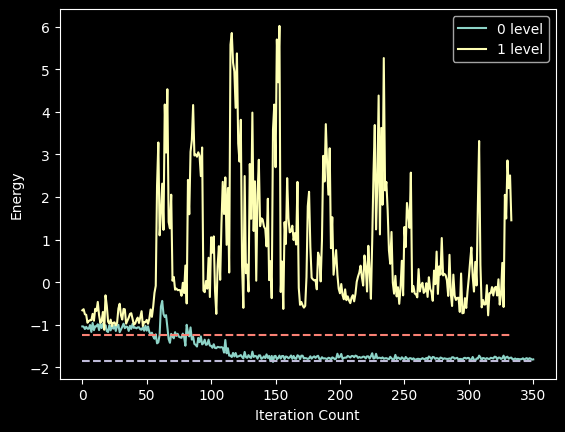

In [49]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

[plt.plot(range(len(energies[eidx])), energies[eidx], label=f'{eidx} level') for eidx in range(kk)]
[plt.plot(range(len(energies[eidx])), [eigens_exact[eidx]]*len(energies[eidx]), ls='--') for eidx in range(kk)]
plt.xlabel('Iteration Count')
plt.ylabel('Energy')
plt.legend(loc=1)

In [2]:
import json
with open('energies-vqd.json', 'r') as handle:
    stored_energies = json.load(handle)

In [3]:
energies = {}
energies[0] = [list(stored_energies['0'][idx].values())[0] for idx in range(len(stored_energies['0']))]
energies[1] = [list(stored_energies['1'][idx].values())[0] for idx in range(len(stored_energies['1']))]

In [6]:
results = [energies[0][-1], energies[1][-1]]
print(results)

[-1.812396261178737, 1.4541251403413418]


In [31]:
# this code produces the output shown from the VQD run on ibm_lagos
# ground state, replace 0 index with 1 for first excited state
[print(f'Iteration {3*(idx+1)}: {energies[0][idx]}') for idx in range(len(energies[0]))]

Iteration 3: -1.0382056008617166
Iteration 6: -1.043449010055383
Iteration 9: -1.0991475296769626
Iteration 12: -1.048740248917583
Iteration 15: -1.0917513815319064
Iteration 18: -1.0908207936962153
Iteration 21: -1.0045573480928254
Iteration 24: -1.1665278591668955
Iteration 27: -0.9577752043151959
Iteration 30: -1.1267180223380715
Iteration 33: -1.0326271696284972
Iteration 36: -1.037688639771772
Iteration 39: -0.987659283105804
Iteration 42: -1.124828085753853
Iteration 45: -0.9730646395626537
Iteration 48: -1.0764693032544939
Iteration 51: -0.9774715309095001
Iteration 54: -1.0691231309956273
Iteration 57: -1.009745661248089
Iteration 60: -1.1487429489225114
Iteration 63: -1.1690133316853355
Iteration 66: -1.0091157125554784
Iteration 69: -1.130684179135256
Iteration 72: -0.9998160962250462
Iteration 75: -1.0910099525926027
Iteration 78: -1.0145267640484403
Iteration 81: -1.1450295977762361
Iteration 84: -1.0186948149960828
Iteration 87: -1.0012827371337458
Iteration 90: -1.1735177

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,